<a href="https://colab.research.google.com/github/heavy-lifting/msc-data-science/blob/main/cop528-ai-applied-machine-learning/AI_05_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 05. Neural Network
## Tutorial 01. Simple neural network example
### 1) loading dataset

In [ ]:
# Use the iris dataset as an example
import numpy as np # for numpy

# Now import a multiclassification model from a neural network for training multiclassification data
from sklearn.neural_network import MLPClassifier

# Now import the libraries in sklearn that are used to evaluate the prediction metrics,
# such as confusion matrices and classification reports
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_data = load_iris()

X = iris_data.data
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 2) calling the model in `sklearn`

#### Main parameters.
- `hidden_layer_sizes`: number of hidden layer cells (tuples)
  - e.g. (100,100,100,50)
- `activation` : activation function
  - `{'identity', 'logistic', 'tanh', 'relu'}` - default `'relu'`
    - `identity`: f(x) = x
    - `logistic`: 1/(1+exp(-x))
    - `tanh`: tanh(x)
    - `relu`: max(0, x)
- `solver` : solver
  - `{'lbfgs', 'sgd', 'adam'}` - default `'adam '`
    - `lbfgs`: newton method
    - `sgd`: stochastic gradient descent
    - `adam`: adaptive momemtum
- `alpha` : L2 regularization parameter (optional)
  - float - default `0.0001`
- `batch_size` : batch size (optional)
  - default `'auto'` (in this case, `batch_size=min(200, n_samples)`
  - not applicable to `'lbfgs'`
- `learning_rate` : learning rate
  - `{'constant', 'invscaling', 'adaptive'}` - default `'constant'`
  -  only for gradient descent `sgd`
- `learning_rate_init` : initial value of the learning rate (optional)
  - default 0.001
  - only for `sgd` or `adam`
- `power_t` : descent exponent (optional)
  - default `0.5`
  - applies to `'invscaling'`,`learning_rate_init/pow(t,power_t)`, `sgd` only
- `max_iter` : maximum number of iterations (optional)
  - default `200`
  - number of iterator convergence iterations
  - for `sgd`/`adam`, represents the number of epochs, not the number of descent steps
- `shuffle` : per iteration, whether to shuffle or not
  - (optional)
  - default `True`
  - only for `sgd` or `adam`
- `random_state`:
  - default `None`
  - if `int`: random number generator seed
  - if `RandomStates` instance: random number generator
  - if `None`: np.random
- `tol` : tolerance
  - (optional)
  - default `1e-4`
  - stop iterating if loss does not reach this value in two consecutive iterations unless set to 'adaptive', otherwise
- `beta_1` : adam exponent decay parameter 1
  - (optional)
  - default `0.9`
- `beta_2` : adam exponential decay parameter 2
  - (optional)
  - default `0.999`
- `epsilon` : adam numerical stability value
  - (optional)
  - default `1e-8`

In [ ]:
# Multiple parameters in parentheses, if not written, default values are used, we generally want to build the hidden
# layer structure, debug the regularization parameters and set the maximum number of iterations
mlp = MLPClassifier(hidden_layer_sizes=(20),alpha=0.01,max_iter=300)
# The model can be trained by calling the fit function. The general method of training by calling the model function is fit()
mlp.fit(X_train,y_train) # Here the y value needs to be reduced to a one-dimensional array
# This is how the model is trained, and we can then call a variety of functions to get the trained parameters
# For example, to get the accuracy rate
print('The accuracy of the test set is:',mlp.score(X_test,y_test))
# e.g. output the current Current value of the loss function
print('The Current value of the loss function of the training set is:',mlp.loss_)
# For example, output the weights of each theta
print('The weight value :',mlp.coefs_)

The accuracy of the test set is: 0.9333333333333333
The Current value of the loss function of the training set is: 0.3066901526899486
The weight value : [array([[ 2.58240406e-01, -1.19535346e-01, -1.98103478e-07,
         1.57073069e-01, -2.61949767e-01, -3.61797988e-01,
        -6.39297514e-02,  1.74161166e-01, -1.28267176e-01,
         5.24670283e-01, -1.73435031e-01, -1.26038637e-01,
         4.26292038e-01, -1.80728203e-01, -2.83163460e-01,
         2.83861358e-01, -2.41813353e-01,  2.49312578e-01,
        -9.28998131e-02, -6.20153393e-03],
       [ 1.54526626e-02,  4.33399444e-01, -1.03722306e-01,
         5.58283933e-01,  1.95491250e-01, -2.16083703e-01,
        -4.54670595e-04,  2.03021198e-01, -1.06721385e-01,
        -2.59561999e-01, -5.31573814e-02, -1.85657201e-08,
        -5.46515987e-01,  6.61348936e-01,  2.38983310e-01,
        -6.30919103e-02,  1.71075054e-01,  4.21298041e-01,
        -2.08579390e-01,  2.54928715e-01],
       [ 4.05796647e-01,  3.22098252e-01, -1.0089963

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### 3) Confusion matrix and classification reports

In [ ]:
# The confusion matrix and classification report is an indicator of the predicted and true values
# The confusion matrix provides a visual indication of the number of correct and incorrect classifications, and the
# category to which the correct samples were incorrectly classified
matrix_test = confusion_matrix(y_test,mlp.predict(X_test))
print('The confusion matrix for the training set is:\n',matrix_test)
# There are multiple metrics in the classification report to evaluate how good the prediction is.
# '''
# TP: Prediction is 1 (Positive), actual is also 1 (Truth-prediction is correct)
# TN: predicted 0 (Negative), also 0 (Truth - predicted correctly)
# FP: predicted 1 (Positive), actually 0 (False - wrong prediction)
# FN: Prediction is 0 (Negative), actual is 1 (False-prediction is wrong)
# '''
report_test = classification_report(y_test,mlp.predict(X_test))
print(f'The classification report for the training set is: \n {report_test}')

The confusion matrix for the training set is:
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
The classification report for the training set is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.83      0.91        18
           2       0.79      1.00      0.88        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



## Task 01. Neural network classification experiments
- use `sklearn` to define a MLP NN and use it to train a model for seeds quality classification_report
- analyse with different numbers of layers and neurons on each layer
### 1) load the data
(bit confused here since the doc says this is a 2-class binary classification problem, but then the def of the data set says there are three classes.... will check now - yep, def three classes. Lets just get on with it though)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


df = pd.read_csv("https://raw.githubusercontent.com/lborohfang/COP528AML_Files/main/seeds_dataset.csv")
print(df.head(10))

seeds_data = np.asarray(df.iloc[:,:-1])
seeds_label= np.asarray(df.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(
 seeds_data, seeds_label, test_size=0.3, random_state=0)


    Area  Perimeter  Compactness  Length of kernel  Width of Kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   
5  14.38      14.21       0.8951             5.386            3.312   
6  14.69      14.49       0.8799             5.563            3.259   
7  14.11      14.10       0.8911             5.420            3.302   
8  16.63      15.46       0.8747             6.053            3.465   
9  16.44      15.25       0.8880             5.884            3.505   

   Asymmetry Coef.  Length of groove  Class  
0            2.221             5.220      1  
1            1.018             4.956      1  
2            2.699             4.825      1  
3            2.259             4.8

array([1, 2, 3])

In [ ]:
# lets just start with a basic model the same as the example
mlp = MLPClassifier(hidden_layer_sizes=(20), alpha= 0.01, max_iter=300)

mlp.fit(X_train, y_train)

# For example, to get the accuracy rate
print('The accuracy of the test set is:',mlp.score(X_test,y_test))
# e.g. output the current Current value of the loss function
print('The Current value of the loss function of the training set is:',mlp.loss_)
# For example, output the weights of each theta - not printing this cause it's massive and not super meaningful to me
# (maybe useful in CW though if we need to analyse in detail)
# print('The weight value :',mlp.coefs_)

# WAIT tho - as I rerun this we are getting v diff outputs...
# it's also complaining about no convergin (most of the time)

matrix_test = confusion_matrix(y_test,mlp.predict(X_test))
print('The confusion matrix for the training set is:\n',matrix_test)

report_test = classification_report(y_test,mlp.predict(X_test))
print(f'The classification report for the training set is: \n {report_test}')

The accuracy of the test set is: 0.3492063492063492
The Current value of the loss function of the training set is: 0.9946203001580677
The confusion matrix for the training set is:
 [[ 2 10  7]
 [16  3  8]
 [ 0  0 17]]
The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.11      0.11      0.11        19
           2       0.23      0.11      0.15        27
           3       0.53      1.00      0.69        17

    accuracy                           0.35        63
   macro avg       0.29      0.41      0.32        63
weighted avg       0.28      0.35      0.28        63



In [ ]:
# lets add an extra layer of 20 neurons
mlp2 = MLPClassifier(hidden_layer_sizes=(20,20), alpha= 0.01, max_iter=300)

mlp2.fit(X_train, y_train)

# For example, to get the accuracy rate
print('The accuracy of the test set is:',mlp2.score(X_test,y_test))
# e.g. output the current Current value of the loss function
print('The Current value of the loss function of the training set is:',mlp2.loss_)
# For example, output the weights of each theta
# print('The weight value :',mlp2.coefs_)

# that's quite a large improvement (except is it tho.... it's all very variable)

matrix_test = confusion_matrix(y_test,mlp2.predict(X_test))
print('The confusion matrix for the training set is:\n',matrix_test)

report_test = classification_report(y_test,mlp2.predict(X_test))
print(f'The classification report for the training set is: \n {report_test}')

The accuracy of the test set is: 0.6507936507936508
The Current value of the loss function of the training set is: 0.8940093183031536
The confusion matrix for the training set is:
 [[ 5 12  2]
 [ 7 20  0]
 [ 1  0 16]]
The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.38      0.26      0.31        19
           2       0.62      0.74      0.68        27
           3       0.89      0.94      0.91        17

    accuracy                           0.65        63
   macro avg       0.63      0.65      0.63        63
weighted avg       0.62      0.65      0.63        63



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# lets massively increasse the iters
mlp3 = MLPClassifier(hidden_layer_sizes=(20,20), alpha= 0.01, max_iter=3000)

mlp3.fit(X_train, y_train)

# For example, to get the accuracy rate
print('The accuracy of the test set is:',mlp3.score(X_test,y_test))
# e.g. output the current Current value of the loss function
print('The Current value of the loss function of the training set is:',mlp3.loss_)
# For example, output the weights of each theta
# print('The weight value :',mlp2.coefs_)

# that's quite a large improvement (except is it tho.... it's all very variable)

# this seems much more stable at around 0.95 accuracy

matrix_test = confusion_matrix(y_test,mlp3.predict(X_test))
print('The confusion matrix for the training set is:\n',matrix_test)

report_test = classification_report(y_test,mlp3.predict(X_test))
print(f'The classification report for the training set is: \n {report_test}')

The accuracy of the test set is: 0.9523809523809523
The Current value of the loss function of the training set is: 0.05148043832079875
The confusion matrix for the training set is:
 [[18  1  0]
 [ 2 25  0]
 [ 0  0 17]]
The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.96      0.93      0.94        27
           3       1.00      1.00      1.00        17

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.96        63
weighted avg       0.95      0.95      0.95        63



In [ ]:
# so now lets try more iters and much bigger layers
mlp4 = MLPClassifier(hidden_layer_sizes=(100,100), alpha= 0.01, max_iter=3000)

mlp4.fit(X_train, y_train)

# For example, to get the accuracy rate
print('The accuracy of the test set is:',mlp4.score(X_test,y_test))
# e.g. output the current Current value of the loss function
print('The Current value of the loss function of the training set is:',mlp4.loss_)

# this isn't really much better than above

matrix_test = confusion_matrix(y_test,mlp4.predict(X_test))
print('The confusion matrix for the training set is:\n',matrix_test)

report_test = classification_report(y_test,mlp4.predict(X_test))
print(f'The classification report for the training set is: \n {report_test}')

The accuracy of the test set is: 0.9523809523809523
The Current value of the loss function of the training set is: 0.07582817630172324
The confusion matrix for the training set is:
 [[17  1  1]
 [ 1 26  0]
 [ 0  0 17]]
The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.94      0.89      0.92        19
           2       0.96      0.96      0.96        27
           3       0.94      1.00      0.97        17

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63



So is this because of the randomness of starting points, splits etc? If I use a random seed does it increase stability across runs?

In [ ]:
# go back to our original model (which was pretty unstable)
mlp5 = MLPClassifier(hidden_layer_sizes=(20), alpha= 0.01, max_iter=300, random_state=77)

mlp5.fit(X_train, y_train)

# For example, to get the accuracy rate
print('The accuracy of the test set is:',mlp5.score(X_test,y_test))
# e.g. output the current Current value of the loss function
print('The Current value of the loss function of the training set is:',mlp5.loss_)
# For example, output the weights of each theta - not printing this cause it's massive and not super meaningful to me
# (maybe useful in CW though if we need to analyse in detail)
# print('The weight value :',mlp.coefs_)

matrix_test = confusion_matrix(y_test,mlp5.predict(X_test))
print('The confusion matrix for the training set is:\n',matrix_test)

report_test = classification_report(y_test,mlp5.predict(X_test))
print(f'The classification report for the training set is: \n {report_test}')

# now I've fixed the random state this is coming in the same every time

The accuracy of the test set is: 0.6666666666666666
The Current value of the loss function of the training set is: 0.8378363840568379
The confusion matrix for the training set is:
 [[ 6 10  3]
 [ 2 20  5]
 [ 1  0 16]]
The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.67      0.32      0.43        19
           2       0.67      0.74      0.70        27
           3       0.67      0.94      0.78        17

    accuracy                           0.67        63
   macro avg       0.67      0.67      0.64        63
weighted avg       0.67      0.67      0.64        63



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Task 02. Neural network classification and visualisation
- similar to how we used a mesh grid to visualise the classifircation boundary of SVM yday, visualise the boundaries of MLP NNs with 1 and 2 hidden layers

In [66]:
# model 1
mlp_vis_1 = MLPClassifier(hidden_layer_sizes=(20), alpha= 0.01, max_iter=300, random_state=77)

mlp_vis_1.fit(X_train, y_train)

print('The accuracy of the test set is:',mlp_vis_1.score(X_test,y_test))

print('The Current value of the loss function of the training set is:',mlp_vis_1.loss_)

matrix_test = confusion_matrix(y_test,mlp_vis_1.predict(X_test))
print('The confusion matrix for the training set is:\n',matrix_test)

report_test = classification_report(y_test,mlp_vis_1.predict(X_test))
print(f'The classification report for the training set is: \n {report_test}')

The accuracy of the test set is: 0.6666666666666666
The Current value of the loss function of the training set is: 0.8378363840568379
The confusion matrix for the training set is:
 [[ 6 10  3]
 [ 2 20  5]
 [ 1  0 16]]
The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.67      0.32      0.43        19
           2       0.67      0.74      0.70        27
           3       0.67      0.94      0.78        17

    accuracy                           0.67        63
   macro avg       0.67      0.67      0.64        63
weighted avg       0.67      0.67      0.64        63



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
# model 2
mlp_vis_2 = MLPClassifier(hidden_layer_sizes=(20,20), alpha= 0.01, max_iter=300, random_state=77)

mlp_vis_2.fit(X_train, y_train)

print('The accuracy of the test set is:',mlp_vis_2.score(X_test,y_test))

print('The Current value of the loss function of the training set is:',mlp_vis_2.loss_)

matrix_test = confusion_matrix(y_test,mlp_vis_2.predict(X_test))
print('The confusion matrix for the training set is:\n',matrix_test)

report_test = classification_report(y_test,mlp_vis_2.predict(X_test))
print(f'The classification report for the training set is: \n {report_test}')

The accuracy of the test set is: 0.9047619047619048
The Current value of the loss function of the training set is: 0.2716486472807431
The confusion matrix for the training set is:
 [[16  1  2]
 [ 2 24  1]
 [ 0  0 17]]
The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.89      0.84      0.86        19
           2       0.96      0.89      0.92        27
           3       0.85      1.00      0.92        17

    accuracy                           0.90        63
   macro avg       0.90      0.91      0.90        63
weighted avg       0.91      0.90      0.90        63



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


- not sure this is the best choice of model as they seem quite similar - can tweak tho if needed
- ok I changed the seed and it's p diff now. feel like the seed shouldn't make that much difference......
- let's forge on for now

In [75]:
# functions for creating class boundaries
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

def plot_mlp(ax, mlp, xx, yy, **params):
  Z = mlp.predict(X_test)
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

ValueError: cannot reshape array of size 63 into shape (220,280)

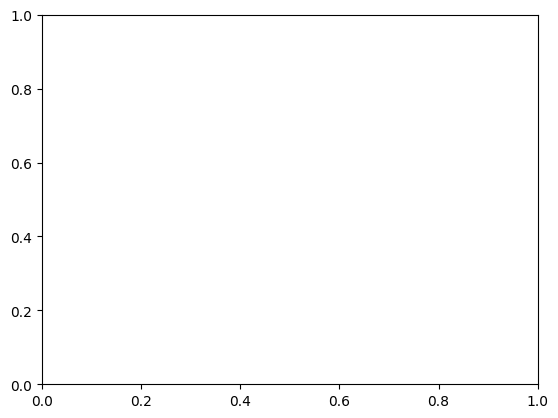

In [76]:
# this is stuff for the SVM
# SVM
# model = svm.SVC(kernel="poly", degree=3)
# clf = model.fit(X, y)

import matplotlib.pyplot as plt

# create the fig
fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of MLP NNs with different numbers of layers')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_mlp(ax, mlp_vis_1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
# print(f'SVM accuracy_score:{accuracy_score(y, clf.predict(X))}')

# # kNN
# from sklearn import neighbors
# clf_kNN = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')
# clf_kNN.fit(X, y)
# y_pred=clf_kNN.predict(X)
# fig, ax = plt.subplots()

# # title for the plots
# title = ('Decision surface of kNN')

# # Set-up grid for plotting.
# X0, X1 = X[:, 0], X[:, 1]
# xx, yy = make_meshgrid(X0, X1)
# plot_contours(ax, clf_kNN, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
# ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
# ax.set_ylabel("{}".format(feature_names[0]))
# ax.set_xlabel("{}".format(feature_names[1]))
# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_title(title)
# plt.show()
# print(f'kNN accuracy_score:{accuracy_score(y, y_pred)}')

# k so this is v reliant on the functions above. I would NOT have worked this out.

__OK__ gonna come back to this as it needs faffing with and not sure it's really the main point of what we're trying to do here

the custom functions need reworking for when you have more than 2 features (or I could just artificially do this with just 2 features)

((or just look at the solutions))

## Task 03. Glass classification

In [103]:
# load data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# read data from google drive - fetch sharing url
url='https://drive.google.com/file/d/1a5i2MXPjm0FE8gb9CnLHd_sDzLnfC9W7/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]


data=pd.read_csv(url)
print(data["Type"].unique())

X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=0)

[1 2 3 5 6 7]


In [117]:
# classify with MLP NN

glass_mlp = MLPClassifier(hidden_layer_sizes=(20,20, 20), alpha= 0.01, max_iter=3000, random_state=41, activation = "tanh")

glass_mlp.fit(X_train, y_train)

# For example, to get the accuracy rate
print('The accuracy of the test set is:',glass_mlp.score(X_test,y_test))
# e.g. output the current Current value of the loss function
print('The Current value of the loss function of the training set is:',glass_mlp.loss_)

matrix_test = confusion_matrix(y_test,glass_mlp.predict(X_test))
print('The confusion matrix for the training set is:\n',matrix_test)

report_test = classification_report(y_test,glass_mlp.predict(X_test))
print(f'The classification report for the training set is: \n {report_test}')

# what did I try?
# MLPClassifier(hidden_layer_sizes=(20,20), alpha= 0.01, max_iter=3000, random_state=41) - accuracy 0.57 (not good)
# MLPClassifier(hidden_layer_sizes=(100,100,100,50), alpha= 0.01, max_iter=3000, random_state=41) - 0.32 (worse)
# MLPClassifier(hidden_layer_sizes=(20,20, 20), alpha= 0.01, max_iter=3000, random_state=41) - 0.66 (better)
# MLPClassifier(hidden_layer_sizes=(20,20, 20), alpha= 0.01, max_iter=3000, random_state=41, batch_size=10) - 0.49 (worse)
# MLPClassifier(hidden_layer_sizes=(20,20, 20), alpha= 0.01, max_iter=3000, random_state=41, batch_size=50) - 0.57 (better but not best)
# MLPClassifier(hidden_layer_sizes=(20,20, 20), alpha= 0.01, max_iter=3000, random_state=41, activation = "logistic") - 0.4 (bad)
# MLPClassifier(hidden_layer_sizes=(20,20, 20), alpha= 0.01, max_iter=3000, random_state=41, activation = "tanh") - 0.68 (best so far)

# is this basically trying to tell me that it's not always that good? IDEK, so tired and brain is fried

The accuracy of the test set is: 0.676923076923077
The Current value of the loss function of the training set is: 0.25909347709038827
The confusion matrix for the training set is:
 [[14  6  1  0  0  0]
 [ 8 17  0  1  0  0]
 [ 5  0  2  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]
The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.52      0.67      0.58        21
           2       0.74      0.65      0.69        26
           3       0.67      0.29      0.40         7
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.68        65
   macro avg       0.77      0.77      0.75        65
weighted avg       0.69      0.68      0.67        65



In [97]:
# SVM classification
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
glass_svm = make_pipeline(StandardScaler(), SVC(gamma = "auto"))
glass_svm.fit(X_train, y_train)

matrix_test = confusion_matrix(y_test,glass_svm.predict(X_test))
print('The confusion matrix for the training set is:\n',matrix_test)

report_test = classification_report(y_test,glass_svm.predict(X_test))
print(f'The classification report for the training set is: \n {report_test}')

# this is slightly better than the MLP (for now - let's see if we can't get a better performance)

The confusion matrix for the training set is:
 [[15  6  0  0  0  0]
 [ 6 19  0  0  1  0]
 [ 3  4  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  7]]
The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.62      0.71      0.67        21
           2       0.63      0.73      0.68        26
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         2
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         7

    accuracy                           0.68        65
   macro avg       0.63      0.66      0.64        65
weighted avg       0.61      0.68      0.64        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
# kNN classification
from sklearn.neighbors import KNeighborsClassifier
glass_knn = KNeighborsClassifier(n_neighbors = 3)
glass_knn.fit(X_train, y_train)

matrix_test = confusion_matrix(y_test,glass_knn.predict(X_test))
print('The confusion matrix for the training set is:\n',matrix_test)

report_test = classification_report(y_test,glass_knn.predict(X_test))
print(f'The classification report for the training set is: \n {report_test}')

The confusion matrix for the training set is:
 [[16  4  1  0  0  0]
 [ 8 17  0  0  1  0]
 [ 7  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  1]
 [ 1  0  0  0  0  6]]
The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.50      0.76      0.60        21
           2       0.81      0.65      0.72        26
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         2
           6       0.50      0.50      0.50         2
           7       0.86      0.86      0.86         7

    accuracy                           0.65        65
   macro avg       0.61      0.63      0.61        65
weighted avg       0.62      0.65      0.62        65

